<a href="https://colab.research.google.com/github/sabdaaf/capstone-ds/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ObesityDataSet.csv')

In [7]:
# Menampilkan beberapa baris pertama dari dataset
print(df.head())

  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_W

In [6]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [9]:
# Menampilkan deskripsi statistik dataset
print(df.describe(include='all'))

         Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
unique  1394      3   1562   1518          5     3   808   637     3     3   
top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
freq     124   1056     58     58       1386  1844   647  1183  1997  2054   

        CH2O family_history_with_overweight   FAF   TUE       CAEC  \
count   2105                           2098  2103  2102       2100   
unique  1263                              3  1186  1130          5   
top        2                            yes     0     0  Sometimes   
freq     441                           1705   404   552       1747   

                       MTRANS      NObeyesdad  
count                    2105            2111  
unique                      6               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1572             351  


In [11]:
# Menampilkan cek missing values dan unique values
print(df.isnull().sum())
print(df.nunique())

Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC                                  3
SMOKE  

In [13]:
# Memeriksa duplikasi data
print(df.duplicated().sum())

18


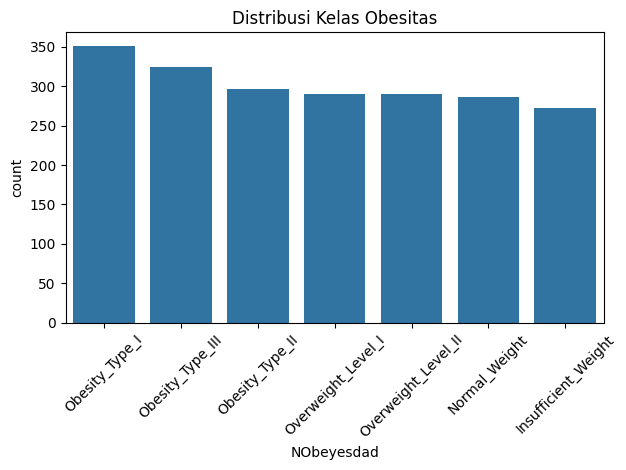

In [14]:
# Cek keseimbangan data target
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Kelas Obesitas')
plt.tight_layout()
plt.show()

In [15]:
# Memilih hanya kolom numerik untuk boxplot
numeric_data = df.select_dtypes(include=['object']).apply(pd.to_numeric, errors='coerce')

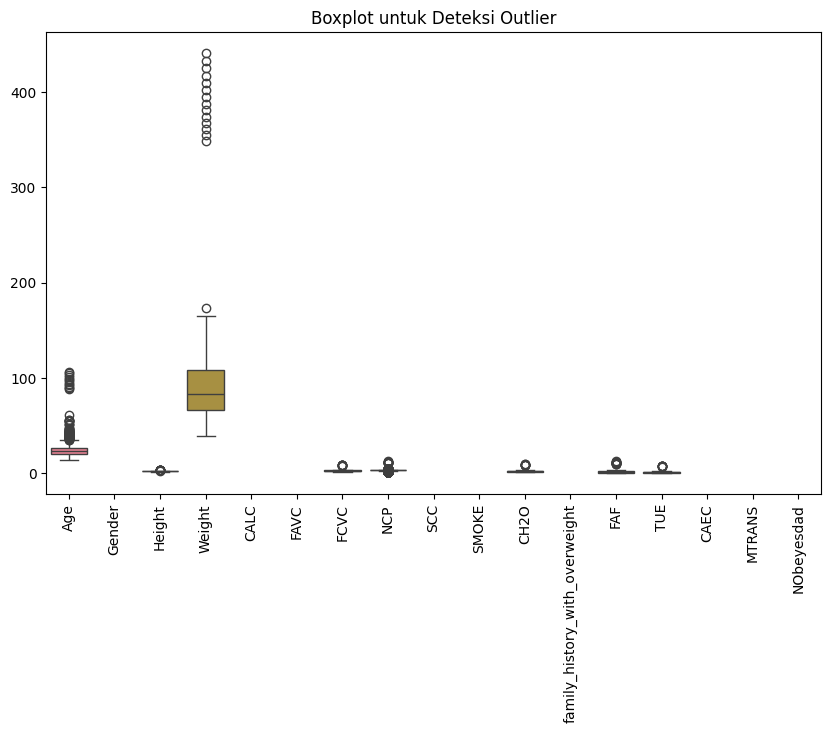

In [18]:
# Membuat boxplot untuk deteksi outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_data)
plt.title('Boxplot untuk Deteksi Outlier')
plt.xticks(rotation=90)
plt.show()

Preprocessing

In [ ]:
# Menampilkan hasil analisis
(df_head, df_info, df_description, missing_values, unique_values, duplicate_data, target_balance)

(  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
 0  21  Female   1.62     64          no   no    2   3   no    no    2   
 1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
 2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
 3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
 4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   
 
   family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
 0                            yes   0   1  Sometimes  Public_Transportation   
 1                            yes   3   0  Sometimes  Public_Transportation   
 2                            yes   2   1  Sometimes  Public_Transportation   
 3                             no   2   0  Sometimes                Walking   
 4                             no   0   0  Sometimes  Public_Transportation   
 
             NObeyesdad  
 0        Normal_Weight  
 1        Normal_Weight  


In [ ]:
# Drop duplikasi
df = df.drop_duplicates()

In [19]:
# Encode fitur kategorikal
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [20]:
# Cek ulang duplikasi
df_encoded.drop_duplicates(inplace=True)

In [21]:
# Normalisasi
scaler = StandardScaler()
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']
X_scaled = scaler.fit_transform(X)

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Convert 'Weight' column to numeric, coercing errors to NaN
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Drop rows where 'Weight' could not be converted to numeric (NaN)
# Or handle NaN values in a different way if appropriate
df = df.dropna(subset=['Weight'])

# Outlier removal (contoh pakai IQR)
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers in the 'Weight' column
df = df[(df['Weight'] >= lower_bound) & (df['Weight'] <= upper_bound)].copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object'):
    if col != 'NObeyesdad':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


In [ ]:
from imblearn.over_sampling import SMOTE

X = df_encoded.drop("NObeyesdad", axis=1)
y = df_encoded["NObeyesdad"]
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    results[name] = {
        'model': model,
        'y_pred': y_pred
    }


Model: KNN
[[59  3  1  0  0  0  1]
 [18 34  3  3  1 11  4]
 [ 0  2 65  5  0  1  1]
 [ 0  1  0 72  0  0  1]
 [ 0  0  0  2 68  0  1]
 [ 4 10  8  0  0 42  4]
 [ 3  0  3  0  1  2 55]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.70      0.92      0.80        64
      Normal_Weight       0.68      0.46      0.55        74
     Obesity_Type_I       0.81      0.88      0.84        74
    Obesity_Type_II       0.88      0.97      0.92        74
   Obesity_Type_III       0.97      0.96      0.96        71
 Overweight_Level_I       0.75      0.62      0.68        68
Overweight_Level_II       0.82      0.86      0.84        64

           accuracy                           0.81       489
          macro avg       0.80      0.81      0.80       489
       weighted avg       0.80      0.81      0.80       489

Model: Random Forest
[[62  2  0  0  0  0  0]
 [ 2 68  0  0  0  4  0]
 [ 0  0 74  0  0  0  0]
 [ 0  0  0 74  0  0  0]
 [ 0  0  0  0 71  0  0]
 [ 0 

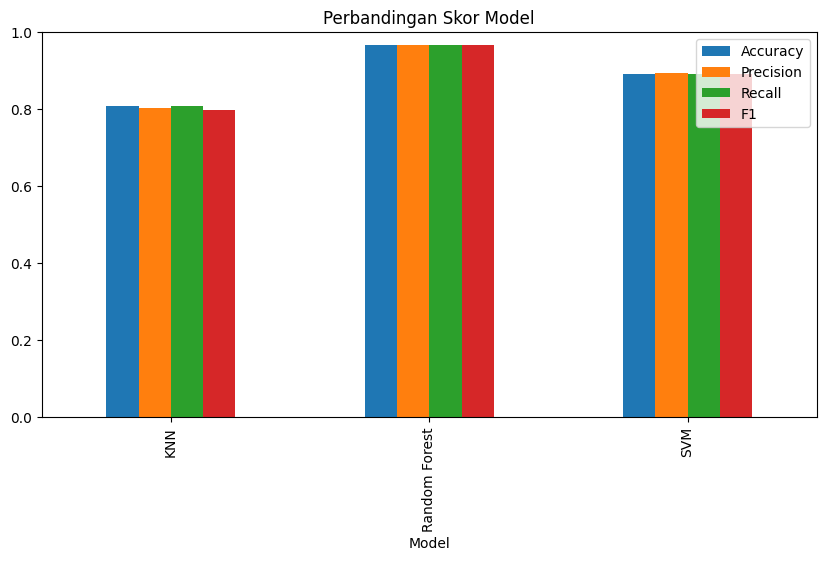

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

scores = []
for name in results:
    y_pred = results[name]['y_pred']
    scores.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted')
    })

scores_df = pd.DataFrame(scores)
scores_df.set_index("Model").plot(kind='bar', figsize=(10,5), ylim=(0,1), title="Perbandingan Skor Model")
plt.show()
